C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76        44
         1.0       0.67      0.45      0.54        31

    accuracy                           0.68        75
   macro avg       0.68      0.65      0.65        75
weighted avg       0.68      0.68      0.67        75



C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 2, 'learning_rate_init': 0.1, 'max_iter': 100, 'solver': 'sgd'}
Accuracy en conjunto de test: 0.7733
Accuracy en conjunto de entrenamiento: 0.8705
              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83        44
         1.0       0.85      0.55      0.67        31

    accuracy                           0.77        75
   macro avg       0.80      0.74      0.75        75
weighted avg       0.79      0.77      0.76        75



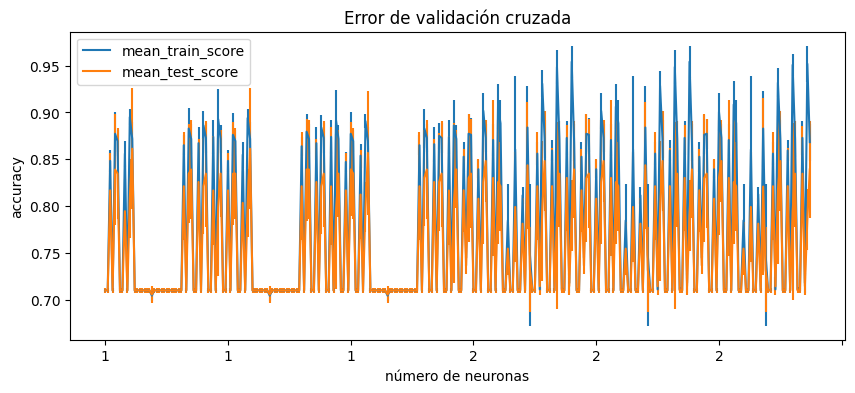

In [1]:
# Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo

# Cargar dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Escalar los datos
scaler = MinMaxScaler()
X = scaler.fit_transform(heart_failure_clinical_records.data.features)
y = scaler.fit_transform(heart_failure_clinical_records.data.targets)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo MLP inicial
modelo = MLPClassifier(hidden_layer_sizes=(5), learning_rate_init=0.01, solver='lbfgs', max_iter=1000, random_state=123)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Reporte de clasificación inicial
print(classification_report(y_test, y_pred))

# Configuración de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [1, 2, (1,1), (1,2), (2,2), 3, 4, 5],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100]
}

# Búsqueda de hiperparámetros
grid = GridSearchCV(MLPClassifier(random_state=123), param_grid, scoring='accuracy', cv=5, refit=True, return_train_score=True)
grid.fit(X_train, y_train)

# Visualización de resultados
fig, ax = plt.subplots(figsize=(10, 4))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validación cruzada')

# Mejor configuración de hiperparámetros
print(grid.best_params_)

# Accuracy en conjunto de test
accuracy_test = grid.score(X_test, y_test)
accuracy_train = grid.score(X_train, y_train)
print(f"Accuracy en conjunto de test: {accuracy_test:.4f}")
print(f"Accuracy en conjunto de entrenamiento: {accuracy_train:.4f}")

# Reporte final de clasificación
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
# Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from ucimlrepo import fetch_ucirepo

# Cargar dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Escalar los datos
scaler = MinMaxScaler()
X = scaler.fit_transform(heart_failure_clinical_records.data.features)
y = scaler.fit_transform(heart_failure_clinical_records.data.targets)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Configuración de hiperparámetros mejorada
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],  # Capas más grandes
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],  # Probar con adam y sgd
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularización L2 más fuerte
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],  # Variar tasa de aprendizaje
    'max_iter': [1000, 2000, 3000],  # Más iteraciones para asegurar convergencia
    'early_stopping': [True],  # Para evitar sobreajuste
    'batch_size': [32, 64, 128]  # Tamaño de lotes más pequeño para mayor precisión
}

# Búsqueda de hiperparámetros
grid = GridSearchCV(
    estimator=MLPClassifier(random_state=123),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    refit=True,
    return_train_score=True
)

# Entrenar modelo
grid.fit(X_train, y_train)

# Visualización de resultados
fig, ax = plt.subplots(figsize=(10, 4))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validación cruzada')

# Mejor configuración de hiperparámetros
print("Mejores Hiperparámetros:", grid.best_params_)

# Accuracy en conjunto de test
accuracy_test = grid.score(X_test, y_test)
accuracy_train = grid.score(X_train, y_train)
print(f"Accuracy en conjunto de test: {accuracy_test:.4f}")
print(f"Accuracy en conjunto de entrenamiento: {accuracy_train:.4f}")

# Reporte final de clasificación
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


In [4]:
scores.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate_init,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2446,0.043544,0.011990,0.000199,0.000398,tanh,0.01,128,True,"(100,)",0.1,...,0.857172,0.051741,1,0.854749,0.860335,0.865922,0.849162,0.866667,0.859367,0.006673
2444,0.066963,0.019604,0.000998,0.000057,tanh,0.01,128,True,"(100,)",0.1,...,0.857172,0.051741,1,0.854749,0.860335,0.865922,0.849162,0.866667,0.859367,0.006673
2442,0.053868,0.010715,0.002137,0.002859,tanh,0.01,128,True,"(100,)",0.1,...,0.857172,0.051741,1,0.854749,0.860335,0.865922,0.849162,0.866667,0.859367,0.006673
2580,0.044524,0.009105,0.003318,0.006163,tanh,0.1,32,True,"(50, 50)",0.01,...,0.852525,0.023801,4,0.837989,0.832402,0.832402,0.871508,0.855556,0.845971,0.015336
2582,0.058691,0.027886,0.000347,0.000433,tanh,0.1,32,True,"(50, 50)",0.01,...,0.852525,0.023801,4,0.837989,0.832402,0.832402,0.871508,0.855556,0.845971,0.015336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.017412,0.002719,0.000804,0.000402,relu,0.0001,128,True,"(50,)",0.0001,...,0.281010,0.052643,2869,0.284916,0.307263,0.307263,0.279330,0.277778,0.291310,0.013240
243,0.016133,0.003713,0.000000,0.000000,relu,0.0001,128,True,"(50,)",0.0001,...,0.281010,0.052643,2869,0.284916,0.307263,0.307263,0.279330,0.277778,0.291310,0.013240
241,0.019150,0.002607,0.000140,0.000280,relu,0.0001,128,True,"(50,)",0.0001,...,0.281010,0.052643,2869,0.284916,0.307263,0.307263,0.279330,0.277778,0.291310,0.013240
601,0.015395,0.004841,0.001887,0.002785,relu,0.001,128,True,"(50,)",0.0001,...,0.281010,0.052643,2869,0.284916,0.307263,0.307263,0.279330,0.277778,0.291310,0.013240


In [7]:
# Seleccionar una fila (ejemplo: la fila 0)
fila = scores.iloc[2446]

títulos = scores.columns.tolist()  # Obtener los nombres de las columnas
fila_como_lista = fila.tolist()  # Obtener los valores de la fila

# Unir los títulos y valores con comas
fila_con_titulos = ','.join(map(str, títulos + fila_como_lista))

print(fila_con_titulos)

mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,0.04354386329650879,0.011990333492230566,0.00019888877868652345,0.00039777755737304695,tanh,0.01,128,True,(100,),0.1,3000,adam,{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 128, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 3000, 'solver': 'adam'},0.9111111111111111,0.7777777777777778,0.9111111111111111,0.8222222222222222,0.8636363636363636,0.8571717171717171,0.0517408405434709,1,0.8547486033519553,0.8603351955307262,0.8659217877094972,0.8491620111731844,0.86666666666

In [53]:
# Importar bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Cargar el dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

X = scaler.fit_transform(heart_failure_clinical_records.data.features)
y = scaler.fit_transform(heart_failure_clinical_records.data.targets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

hidden_layer_configs = [
    (5,),        # 5 neuronas en una capa
    (10,),       # 10 neuronas en una capa
    (5, 5),      # 5 neuronas en 2 capas
    (10, 10),    # 10 neuronas en 2 capas
    (5, 10),     # 5 neuronas en la primera capa y 10 en la segunda
    (10, 5),     # 10 neuronas en la primera capa y 5 en la segunda
    (20,),       # 20 neuronas en una capa
    (5, 5, 5)    # 3 capas con 5 neuronas cada una
]

# Iterar sobre cada configuración de hidden_layer_sizes
for config in hidden_layer_configs:
    # Definir el modelo con la configuración actual
    modelo = MLPClassifier(
        activation='tanh',
        alpha=0.01,
        batch_size=128,
        early_stopping=True,
        hidden_layer_sizes=config,
        learning_rate_init=0.1,
        max_iter=3000,
        solver='adam',
        random_state=123
    )

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = modelo.predict(X_test)

    # Evaluar el modelo
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f"Accuracy en el conjunto de prueba para hidden_layer_sizes={config}: {accuracy_test:.4f}")

    # Imprimir el informe de clasificación
    print(classification_report(y_test, y_pred))


C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y

Accuracy en el conjunto de prueba para hidden_layer_sizes=(5,): 0.7500
              precision    recall  f1-score   support

         0.0       0.71      0.97      0.82        35
         1.0       0.92      0.44      0.59        25

    accuracy                           0.75        60
   macro avg       0.81      0.71      0.71        60
weighted avg       0.80      0.75      0.73        60

Accuracy en el conjunto de prueba para hidden_layer_sizes=(10,): 0.6333
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76        35
         1.0       1.00      0.12      0.21        25

    accuracy                           0.63        60
   macro avg       0.81      0.56      0.49        60
weighted avg       0.77      0.63      0.53        60

Accuracy en el conjunto de prueba para hidden_layer_sizes=(5, 5): 0.8333
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        35
         1.0       0.

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
